In [1]:
import numpy as np

# Linear Regression Stratch

In [51]:
class ScratchLinearRegression():
    def __init__(self, num_iter, lr, no_bias, verbose): 
        
        self.num_iter = num_iter
        self.lr = lr
        self.bias = no_bias
        self.verbose = verbose
        self.theta = np.array([])
        self.loss = np.array([])
        self.val_loss = np.array([])
        self.verbose = verbose

    # 問題6（学習と推定）
    def fit(self, X, y, X_val, y_val):
        """
        線形回帰の学習
        """
        if self.bias == True:
            bias = np.ones((X.shape[0], 1))
            X = np.hstack((bias, X))
            bias = np.ones((X_val.shape[0], 1))
            X_val = np.hstack((bias, X_val))
            self.theta = np.random.rand(X.shape[1])
            self.theta = self.theta.reshape(X.shape[1], 1)

        for i in range(self.num_iter):
            pred = self._linear_hypothesis(X)
            pred_val = self._linear_hypothesis(X_val)
            self._gradient_descent(X, y)
            loss = self._loss_func(pred, y)
            self.loss = np.append(self.loss, loss)
            loss_val = self._loss_func(pred_val, y_val)
            self.val_loss = np.append(self.val_loss, loss_val)
            if self.verbose == True:
                print('{}-th epoch train loss {}'.format(i, np.round(loss, 2)))
                print('{}-th epoch val loss {}'.format(i, np.round(loss_val, 2)))


    # 問題1
    def _linear_hypothesis(self, X):
        """
        仮定関数の出力を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
        """
        pred = X @ self.theta
        
        return pred

    # 問題2
    def _gradient_descent(self, X, y):
        m = X.shape[0]
        n = X.shape[1]
        pred = self._linear_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient += (pred[i] - y[i]) * X[i, j]
            self.theta[j] = self.theta[j] - self.lr * (gradient / m)

        return self.theta
        

    # 問題3
    def predict(self, X):
        if self.bias == True:
            bias = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([bias, X])
        pred_y = self._linear_hypothesis(X)
        return pred_y

    # 問題4
    def _mse(self, y_pred, y):
        """
        平均二乗誤差の計算
        """
        mse = ((y_pred - y) ** 2).sum() / X.shape[0]
        
        return mse

    # 問題5
    def _loss_func(self, pred, y):
        """
        損失関数
        """
        loss = self._mse(pred, y)/2

        return loss
        

# Test

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
dataset = pd.read_csv("../data/house_price/train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [53]:
slr = ScratchLinearRegression(num_iter=10, lr=0.1, no_bias=True, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)

0-th epoch train loss 15698324415.92
0-th epoch val loss 3546210570.26
1-th epoch train loss 5.556435589162068e+21
1-th epoch val loss 1.389362898586101e+21
2-th epoch train loss 2.199443971349543e+33
2-th epoch val loss 5.4983870648416336e+32
3-th epoch train loss 8.706383989446413e+44
3-th epoch val loss 2.1764957311988976e+44
4-th epoch train loss 3.4463766337885893e+56
4-th epoch val loss 8.615543478101066e+55
5-th epoch train loss 1.3642301920539157e+68
5-th epoch val loss 3.4104178796871456e+67
6-th epoch train loss 5.400233969395118e+79
6-th epoch val loss 1.3499961069130329e+79
7-th epoch train loss 2.1376544144872877e+91
7-th epoch val loss 5.343889086716646e+90
8-th epoch train loss 8.461793362425065e+102
8-th epoch val loss 2.115350586935621e+102
9-th epoch train loss 3.349556711464729e+114
9-th epoch val loss 8.373504825861669e+113


In [44]:
slr.predict(X_test)

array([[-1.60425456e+63],
       [-1.81209562e+63],
       [-1.84785034e+63],
       [-1.69241109e+63],
       [-2.06553296e+63],
       [-1.93927703e+63],
       [-2.28668048e+63],
       [-2.23602234e+63],
       [-1.90730323e+63],
       [-2.10741324e+63],
       [-1.45189365e+63],
       [-1.86924615e+63],
       [-1.56528331e+63],
       [-2.05448377e+63],
       [-1.70435472e+63],
       [-1.68391540e+63],
       [-1.84189121e+63],
       [-1.80069938e+63],
       [-1.96980057e+63],
       [-1.66479658e+63],
       [-2.15224488e+63],
       [-2.26835731e+63],
       [-1.59997145e+63],
       [-1.87183068e+63],
       [-2.05637985e+63],
       [-1.76358189e+63],
       [-1.66695788e+63],
       [-2.04282513e+63],
       [-1.84161187e+63],
       [-1.84099395e+63],
       [-2.35541063e+63],
       [-1.86920665e+63],
       [-1.90010261e+63],
       [-2.37529691e+63],
       [-2.58864849e+63],
       [-2.13399790e+63],
       [-1.89942829e+63],
       [-1.60363382e+63],
       [-1.7

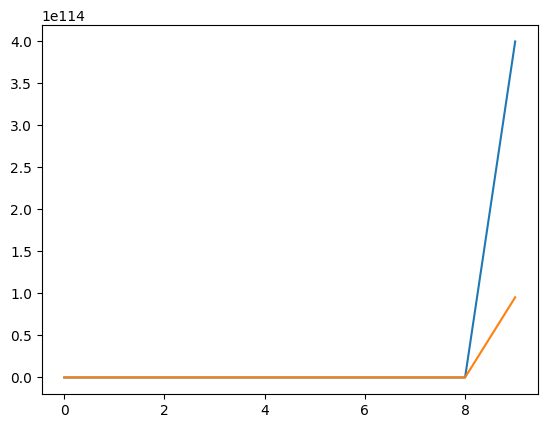

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(slr.loss)
plt.plot(slr.val_loss)